Лабораторна робота 4

Завантаження набору даних:

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Target кожного 100 зразка:

In [2]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

Перевірка розмірностей набору даних:

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

Представлення зображення з індексом 15 в наборі даних:

In [5]:
digits.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

Візуалізація даних:

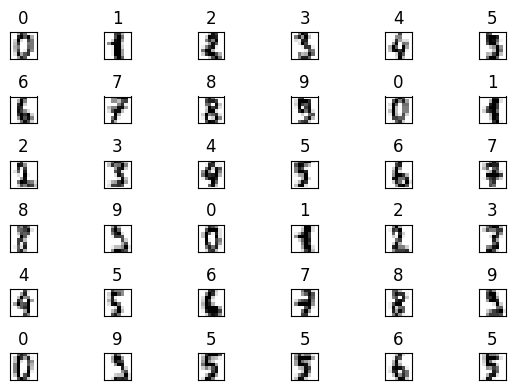

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(6,4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

plt.tight_layout()

Розбиття даних на 70% навчальних і 30% тестових:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.3)

Перевірка розмірностей наборів даних:

In [9]:
X_train.shape

(1257, 64)

In [10]:
X_test.shape

(540, 64)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

Прогнозування:

In [12]:
predicted = knn.predict(X=X_test)
expected = y_test

Порівняння прогнозованих та очікуваних результатів:

In [13]:
print(predicted[:20])
print(expected[:20])
print()
print(predicted[:24])
print(expected[:24])
print()
print(predicted[:36])
print(expected[:36])
print()

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6 9 6 0 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6 9 6 0 6]

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6 9 6 0 6 9 3 2 1 8 1 7 0 4 4 1 5]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6 9 6 0 6 9 3 2 1 8 1 7 0 4 4 1 5]



In [15]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [16]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [17]:
confusion

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  3,  1,  2,  0,  0,  0,  0, 44,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 50]], dtype=int64)

Звіт класифікації:

In [18]:
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.95      1.00      0.97        54
           2       0.98      1.00      0.99        61
           3       0.96      0.96      0.96        55
           4       0.98      0.98      0.98        58
           5       0.98      1.00      0.99        51
           6       1.00      1.00      1.00        57
           7       0.96      1.00      0.98        52
           8       0.98      0.86      0.92        51
           9       0.98      0.96      0.97        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



Підключення 2 нових моделей:

In [19]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Навчання моделей:

In [22]:
svm = SVC()
svm.fit(X_train, y_train)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Результат:

In [23]:
print('SVC')
print('Точність:')
print(f'{svm.score(X_test, y_test):.2%}')
print('GaussianNB')
print('Точність:')
print(f'{gnb.score(X_test, y_test):.2%}')

SVC
Точність:
98.70%
GaussianNB
Точність:
86.30%


In [24]:
for k in range(3, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'Кількість найблищих сусідів: {k}, точність: {knn.score(X_test, y_test):.2%}')

Кількість найблищих сусідів: 3, точність: 98.15%
Кількість найблищих сусідів: 4, точність: 97.59%
Кількість найблищих сусідів: 5, точність: 97.78%
Кількість найблищих сусідів: 6, точність: 97.78%
Кількість найблищих сусідів: 7, точність: 97.96%
Кількість найблищих сусідів: 8, точність: 97.78%
Кількість найблищих сусідів: 9, точність: 97.59%
Кількість найблищих сусідів: 10, точність: 97.59%
Кількість найблищих сусідів: 11, точність: 97.78%
Кількість найблищих сусідів: 12, точність: 97.41%
Кількість найблищих сусідів: 13, точність: 97.78%
Кількість найблищих сусідів: 14, точність: 97.41%
